# METADATA
**Creation date** : 10/31/2025  
**Last modification date** : 7/12/2025  
**GOAL** : Data Preparation  
**LinkedIn** : www.linkedin.com/in/moustapha-diagne-bb87937b


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-sales-the-data-quality-challenge/Superstore_Orders_q1.csv
/kaggle/input/superstore-sales-the-data-quality-challenge/Superstore_Orders_q2.csv


In [2]:
# Enables to use markdown in code cells
from IPython.display import Markdown, display

In [3]:
basepath = "/kaggle/input/superstore-sales-the-data-quality-challenge/Superstore_Orders_"

df_store_orders_q1 = pd.read_csv(basepath+"q1.csv")
df_store_orders_q2 = pd.read_csv(basepath+"q2.csv")

# 1 - DATA PROFILING

Let's explore the raw data to understand structure, types, distributions, missing values, outliers, relationships.

**Goal**: assess what’s inside the datasets and identify potential issues.

## 1.1 - Structure

**Goal**: Get a quick overview of the dataset’s shape and layout.

In [4]:
display(Markdown(f"The **.info()** method efficiently regroups all the information on structure we would get with .shape, .dtypes, .columns. "))

df_store_orders_q1.info()
print("\n")
df_store_orders_q2.info()
print("\n")

display(Markdown(f"Le dataset **df_store_orders_q1** contient {df_store_orders_q1.shape[0]} lignes et {df_store_orders_q1.shape[1]} colonnes"))
display(Markdown(f"Le dataset **df_store_orders_q2** contient {df_store_orders_q2.shape[0]} lignes et {df_store_orders_q2.shape[1]} colonnes"))
display(Markdown(f"Both data set"))

The **.info()** method efficiently regroups all the information on structure we would get with .shape, .dtypes, .columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12617 entries, 0 to 12616
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        12617 non-null  int64  
 1   Order ID      12617 non-null  object 
 2   Order Date    12617 non-null  object 
 3   Ship Date     12617 non-null  object 
 4   Ship Mode     12617 non-null  object 
 5   Customer ID   12617 non-null  object 
 6   Country       12617 non-null  object 
 7   City          12617 non-null  object 
 8   State         12617 non-null  object 
 9   Postal Code   12617 non-null  int64  
 10  Region        11979 non-null  object 
 11  Product ID    12617 non-null  object 
 12  Category      12617 non-null  object 
 13  Sub-Category  12617 non-null  object 
 14  Product Name  12617 non-null  object 
 15  Sales         12617 non-null  float64
 16  Quantity      12617 non-null  int64  
 17  Discount      11707 non-null  float64
 18  Profit        11735 non-nu

Le dataset **df_store_orders_q1** contient 12617 lignes et 19 colonnes

Le dataset **df_store_orders_q2** contient 12617 lignes et 19 colonnes

Both data set

In [5]:
display(Markdown(f"### Q1"))

# df_store_orders_q1.head(3)
# df_store_orders_q1.tail(2)
df_store_orders_q1.sample(5)

### Q1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7430,7431,US-2014-164763,03/17/2014,03/21/2014,Standard Class,MH-17440,United States,Jackson,Mississippi,39212,South,OFF-PA-10003063,OfficeSupply,Paper,EcoTones Memo Sheets,16.000,4,0.0,7.68
3602,3603,CA-2014-159835,11/17/2014,11/24/2014,Standard Class,RB-19330,United States,Philadelphia,Pennsylvania,19143,East,FUR-CH-10004997,Furni,Chairs,Hon Every-Day Series Multi-Task Chairs,657.930,5,0.3,-93.99
118,119,US-2015-136476,04/05/2015,04/10/2015,Standard Class,GG-14650,United States,Bristol,Tennessee,37620,South,OFF-BI-10003650,OfficeSupply,Binders,GBC DocuBind 300 Electric Binding Machine,157.794,1,0.7,-115.7156
6784,6785,CA-2017-121293,07/25/2017,07/28/2017,Second Class,JC-15775,United States,Philadelphia,Pennsylvania,19143,--,FUR-TA-10001771,Furni,Tables,"Bush Cubix Conference Tables, Fully Assembled",138.588,1,0.4,-34.647
10214,10215,CA-2017-122475,12/10/2017,12/13/2017,First Class,SE-20110,United States,Pine Bluff,Arkansas,71603,--,OFF-BI-10003650,OfficeSupply,Binders,GBC DocuBind 300 Electric Binding Machine,0.010,11,0.6,-0.0017


In [6]:
display(Markdown(f"### Q2"))

# df_store_orders_q2.head(3)
# df_store_orders_q2.tail(2)
df_store_orders_q2.sample(5)

### Q2

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1060,13678,CA-2016-497534,06/19/2015,06/22/2015,Standard Class,SC-20020,United States,Wheeling,Illinois,60090,NaN,OFF-BI-10004656,OfficeSupply,Binders,Peel & Stick Add-On Corner Pockets,450.6293,4,0.30,NaN
2122,14740,US-2016-555071,03/02/2014,03/04/2014,First Class,BH-11710,United States,Franklin,Tennessee,37064,NaN,OFF-FA-10002701,OfficeSupply,Fasteners,Alliance Rubber Bands,476.6686,10,0.40,105.1806
7249,19867,US-2016-986645,06/09/2015,06/16/2015,First Class,ZC-21910,United States,Everett,Washington,98208,West,OFF-PA-10000157,OfficeSupply,Paper,Xerox 191,141.6441,9,0.20,-4.3133
6794,19412,CA-2016-540490,04/02/2017,04/04/2017,Second Class,AI-10855,United States,Mishawaka,Indiana,46544,Central,OFF-BI-10002412,OfficeSupply,Binders,Wilson Jones Snap Scratch Pad Binder Tool fo...,353.2176,3,0.32,NaN
1068,13686,CA-2017-838575,11/27/2015,12/01/2015,Second Class,FA-14230,United States,Georgetown,Kentucky,40324,South,OFF-AR-10000538,OfficeSupply,Art,"Boston Model 1800 Electric Pencil Sharpener, Gray",339.6650,8,0.70,23.6469


### Hot Take Analysis :

#### What are the data about ?
We can see the data are coming from an office retailer product order book apparently based in the US and shipping orders only for customers in the US. 

Notice the datasets are respectively name "q1" and "q2". This could mistakenly lead users to think the data only concerns a quarter of a year but it is clearly not the case. The samples have a wide range of order dates accross different years (2014-2017 ?) and months. 

The 'Sales' column probably refers to the total revenue = quantity x (unit price * (1 - discount)). When we see some binders or paper with huge sale values it is appalling but we can quickly see that the product description refers to industrial or bulk purchase. For instance :

Fellowes PB500 Electric Punch Plastic Comb Binding Machine
Cardinal Slant-D Ring Binders (Industrial 500-pack units)
Ibico EPK-21 Electric Binding System

The 500-pack units confirms. So really high values must be considered normal.

## 1.2 - Data Types

**Goal**: Check and validate data types for each column.

### Hot Take Analysis :
(see .info method results above)

#### Wrong Types
We can notice several wrong data type attribution for : 'Postal Code' that does not make any sense as an integer type, 'Profit' that should not be an object type (the default for string types) but rather a decimal type (float).

#### Not technically wrong but not ideal types
##### Especially for further Calculation
Only 3 different data types seem to be used. If we need to be able to time-based calculation then it would be best suited to change 'Order Date', 'Ship Date' to an actual date type.

##### Especially for Memory
Here the both dataset seems very light (less than 2MB) if one was above 100MB it would absolutely be worth optimizing the data types to lower the load. Though it has plenty of object types that are underestimating the real load (only gauging references). 

## 1.3 - Distribution

**Goal**: Understand how values are spread within each column.

In [7]:
df_store_orders_q2.describe(include='all')
# df_store_orders_q1.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,12617.000000,12617,12617,12617,12617,12617,12617,12617,12617,12617.000000,11994,12617,12617,12617,12617,12617.000000,12617.000000,11761.000000,11737
unique,NaN,12504,1458,1463,4,793,1,530,49,NaN,5,1860,4,17,1817,NaN,NaN,NaN,7728
top,NaN,US-2015-251422,05/17/2015,11/21/2014,Second Class,ML-18040,United States,Los Angeles,California,NaN,Central,OFF-SU-10004261,OfficeSupply,Paper,Staples,NaN,NaN,NaN,-0.00
freq,NaN,2,21,18,3236,29,12617,105,1796,NaN,3597,19,7416,1896,65,NaN,NaN,NaN,137
mean,18926.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56251.304193,NaN,NaN,NaN,NaN,NaN,390.203100,7.462392,0.375203,NaN
std,3642.358508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29089.870315,NaN,NaN,NaN,NaN,NaN,747.188423,4.047929,0.234750,NaN
min,12618.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN
25%,15772.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33021.000000,NaN,NaN,NaN,NaN,NaN,0.010000,4.000000,0.200000,NaN
50%,18926.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,227.980100,7.000000,0.320000,NaN
75%,22080.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81001.000000,NaN,NaN,NaN,NaN,NaN,650.057900,11.000000,0.500000,NaN


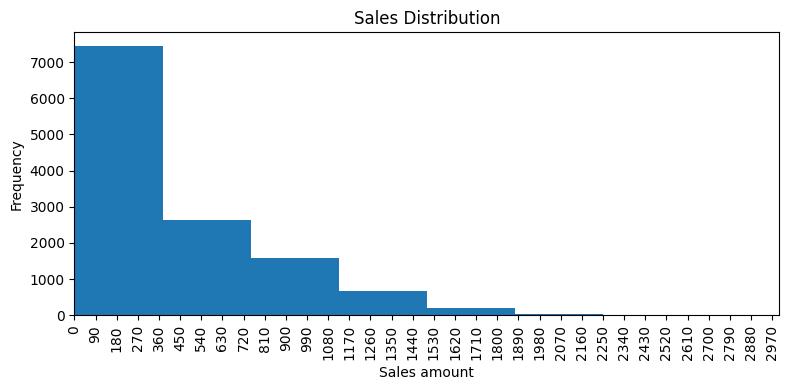

In [8]:
import matplotlib.pyplot as plt

# Calculate bin width based on your range and number of bins
x_min, x_max = 0, 3000
bins = 100
bin_width = (x_max - x_min) / bins 

plt.figure(figsize=(8,4))
df_store_orders_q2["Sales"].plot(kind="hist", bins=bins, title="Sales Distribution")

plt.xlabel("Sales amount")
plt.xlim(x_min, x_max)

# 👇 Tick marks exactly aligned with histogram bin edges
plt.xticks(np.arange(x_min, x_max, bin_width*3), rotation=90)

plt.tight_layout()
plt.show()


### Hot Take Analysis : 

#### Non-Numeric Columns
We count 14 non-numeric columns out of 19 columns.

##### Country
The unique value being 1 confirms the dataset is strictly about US orders.

##### Orders ID
The total of unique values (12504) of 'Order ID' are almost as many as the total row number (12617). So less than 1% 'Order ID' values are repeated, it means than 1% of the lines are concerning the same order. This information is backed up by the fact the count of mode value of 'Order ID' is only 2. This could mean that not enough effort is put into making complementary product sales. This leads us to focus on customers and sales amounts.

##### Customer ID
On one hand, we count 793 distinct customers for 12504 unique orders, so the average customer orders approximately 15 times. We can see the customer that passes the most orders is ML-18040 with 29 times.

##### Profitability
The most occurring value is 0 with a frequency of 137 times out of 12617 lines (1% of the orders). It does not seem concerning 1% being insignificant but now it may be interesting to investigate if there are lines with a negative profitability. Here a lot of valuable information on profit is left out as the column type is wrong and should normally be a numeric column.

#### Numeric Columns
Most aggregation functions are irrelevant as we only have 5 numeric or decimal columns out of 19 columns.

##### Sales
On the other hand, we remark the average sale price is almost 400 dollars but the standard deviation is high (almost 2 times the mean's value). On average, each sale differs from the mean sale value by about $747. In other words sales amounts vary a lot, meaning products or orders differ widely in price. It is very likely to have plenty of small sale prices and a few large ones (confirmed by the bar chart right above).

##### Quantity
There is not much to say on the quantity distribution. The mean and the median both are around 7 and the coefficient of variation of the std/mean ratio is approximately at 0.5. It means the quantity distribution is balanced (moderate values spread)

## 1.4 - Missing Values

**Goal**: Detect and measure missing data.

For both datasets, q1 and q2 :
- We have 12 617 total lines. 
- As their line count is not maxed out in the result returned by .info() method, we can already infer that values are missing for : 'Region', 'Discount', 'Profit'.

In [9]:
# We store the Pandas Series
null_counts = df_store_orders_q1.isnull().sum()
# We apply a filter to the Pandas Series
null_counts[null_counts > 0]

Region      638
Discount    910
Profit      882
dtype: int64

In [10]:
null_percentage = df_store_orders_q1.isnull().mean()
null_percentage[null_percentage > 0]

Region      0.050567
Discount    0.072125
Profit      0.069906
dtype: float64

In [11]:
# We store the Pandas Series
null_counts = df_store_orders_q2.isnull().sum()
# We apply a filter to the Pandas Series
null_counts[null_counts > 0]

Region      623
Discount    856
Profit      880
dtype: int64

In [12]:
null_percentage = df_store_orders_q2.isnull().mean()
null_percentage[null_percentage > 0]

Region      0.049378
Discount    0.067845
Profit      0.069747
dtype: float64

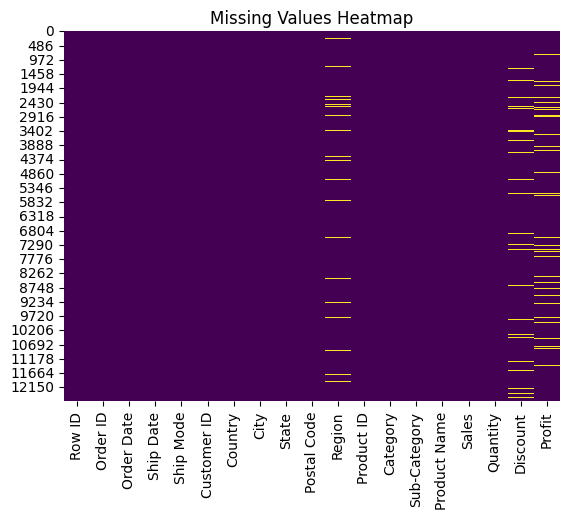

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_store_orders_q1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

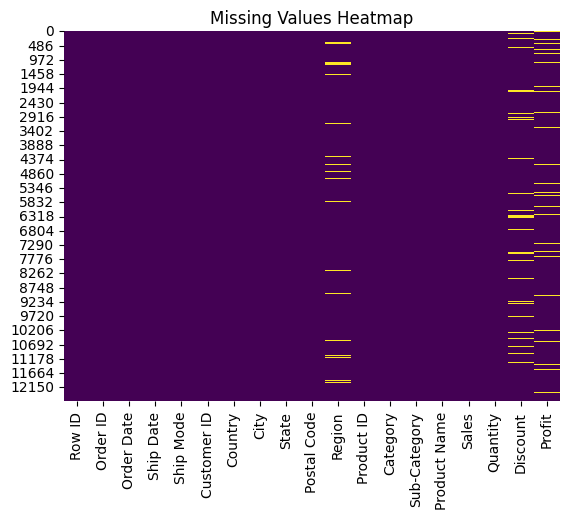

In [14]:
sns.heatmap(df_store_orders_q2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Hot Take Analysis : 

We can confirm that the 'Region', 'Discount' and 'Profit' columns are missing information approximately/respectively for 5%, 7% and 7% in both datasets. The heatmaps show that missing values seem fairly scattered in their own fields.

## 1.5 - Outliers

**Goal**: Identify extreme or unusual values.

For non numeric columns we need to insure that: 
- There is no duplicated, mispelled or redundant values by checking the distinct values.
- There is no Order Date set after their Shipment Date.

### 'Ship Mode' column

In [15]:
print(df_store_orders_q1['Ship Mode'].value_counts())

display(Markdown(f"The difference between Standard Class and Second Class is blurry. Maybe they should all be regrouped into one block but we cannot really tell."))

Ship Mode
Standard Class    6619
Second Class      2616
First Class       2200
Same Day          1182
Name: count, dtype: int64


The difference between Standard Class and Second Class is blurry. Maybe they should all be regrouped into one block but we cannot really tell.

### 'Country' column

In [16]:
df_store_orders_q1['Country'].value_counts()
df_store_orders_q1['City'].value_counts()
df_store_orders_q1['State'].value_counts()
df_store_orders_q1['Postal Code'].value_counts()

Postal Code
10035    267
10024    232
10009    232
94122    209
10011    197
        ... 
46544      2
53186      2
57401      1
60441      1
82001      1
Name: count, Length: 631, dtype: int64

### 'State' column

In [17]:
df_store_orders_q1['State'].nunique()

49

### 'Region' column

In [18]:
print(df_store_orders_q1['Region'].value_counts())

display(Markdown(f"We can see the North cardinality is missing."))

Region
West       3575
East       3038
Central    2804
South      1960
--          602
Name: count, dtype: int64


We can see the North cardinality is missing.

### 'Category' column

In [19]:
print(df_store_orders_q1['Category'].value_counts())

display(Markdown(f"We can tell right away that the categories are off. The inconsistency of the upper and lower case is a dead give away. \"Tech\" and \"technologies\" are redundant. We should have only 2 categories."))

Category
OfficeSupply    7592
Furni           2622
Tech            1224
technologies    1179
Name: count, dtype: int64


We can tell right away that the categories are off. The inconsistency of the upper and lower case is a dead give away. "Tech" and "technologies" are redundant. We should have only 2 categories.

### 'Sub-Category' column

In [20]:
print(df_store_orders_q1['Sub-Category'].value_counts())


Sub-Category
Binders        1819
Paper          1776
Furnishings    1197
Phones         1148
Storage        1045
Art            1002
Accessories     977
Chairs          742
Appliances      619
Labels          462
Tables          387
Envelopes       329
Bookcases       296
Fasteners       289
Supplies        251
Machines        194
Copiers          84
Name: count, dtype: int64


### Date columns

In [21]:
print(df_store_orders_q1.loc[df_store_orders_q1['Order Date'] > df_store_orders_q1['Ship Date'], ['Order Date', 'Ship Date']].head(5))

display(Markdown(f"Obviously, if we need to check for instances where Order Date > Ship Date we need to change the date columns to date types first for it to work properly."))

     Order Date   Ship Date
270  12/28/2017  01/02/2018
305  12/30/2014  01/04/2015
525  12/26/2015  01/02/2016
570  12/28/2017  01/04/2018
571  12/28/2017  01/04/2018


Obviously, if we need to check for instances where Order Date > Ship Date we need to change the date columns to date types first for it to work properly.

### Numeric columns

For the numeric columns, we need to apply the “x times std” rule comes from the empirical rule (normal distribution assumption):

| Range | Expected % of data |
|------|-------|
| mean ± 1 × std | ~68% |
| mean ± 2 × std | ~95% |
| mean ± 3 × std | ~99.7% |

We can do easiliy do so using the .quantile method.

#### 'Sales' column

This is one of the key columns.

In [22]:
print("Q1 : \n" + str(df_store_orders_q1['Sales'].quantile([0.003, 0.997])))
print("\n")
print("Q2 : \n" + str(df_store_orders_q2['Sales'].quantile([0.003, 0.997])))

Q1 : 
0.003       0.000000
0.997    4357.102656
Name: Sales, dtype: float64


Q2 : 
0.003       0.000000
0.997    2026.259478
Name: Sales, dtype: float64


In [23]:
df_store_orders_q2.iloc[4258]

Row ID                                                      16876
Order ID                                           US-2015-991724
Order Date                                             04/10/2015
Ship Date                                              04/13/2015
Ship Mode                                             First Class
Customer ID                                              RS-19765
Country                                             United States
City                                                   Long Beach
State                                                  California
Postal Code                                                 90805
Region                                                       West
Product ID                                        OFF-PA-10004071
Category                                             OfficeSupply
Sub-Category                                                Paper
Product Name    Eaton Premium Continuous-Feed Paper, 25% Cotto...
Sales     

In [24]:
df_store_orders_q1.loc[df_store_orders_q1['Sales'] <= 0].sample(3)
# df_store_orders_q2.loc[df_store_orders_q2['Sales'] <= 0].sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3380,3381,CA-2017-103156,11/23/2017,11/24/2017,First Class,TD-20995,United States,Philadelphia,Pennsylvania,19120,East,FUR-FU-10000320,Furni,Furnishings,OIC Stacking Trays,0.0,9,0.2,0.00
1978,1979,CA-2015-109939,05/08/2015,05/12/2015,Standard Class,AA-10375,United States,Salem,Oregon,97301,West,OFF-AR-10000127,OfficeSupply,Art,Newell 321,0.0,2,0.2,0.0
1643,1644,CA-2015-111829,03/19/2015,03/20/2015,First Class,FH-14365,United States,Seattle,Washington,98115,West,OFF-ST-10000142,OfficeSupply,Storage,Deluxe Rollaway Locking File with Drawer,0.0,3,0.0,0.0


In [25]:
print("Nb of Sales equals or lesser than 0 in q1 dataset: " + str(df_store_orders_q1.loc[df_store_orders_q1['Sales'] <= 0, 'Sales'].count()))
print("Nb of Sales equals or lesser than 0 in q2 dataset: " + str(df_store_orders_q2.loc[df_store_orders_q2['Sales'] <= 0, 'Sales'].count()))
print("")
print("Nb of Sales equals or lesser than 1 in q1 dataset: " + str(df_store_orders_q1.loc[df_store_orders_q1['Sales'] <= 1, 'Sales'].count()))
print("Nb of Sales equals or lesser than 1 in q2 dataset: " + str(df_store_orders_q2.loc[df_store_orders_q2['Sales'] <= 1, 'Sales'].count()))

Nb of Sales equals or lesser than 0 in q1 dataset: 48
Nb of Sales equals or lesser than 0 in q2 dataset: 52

Nb of Sales equals or lesser than 1 in q1 dataset: 981
Nb of Sales equals or lesser than 1 in q2 dataset: 4519


We clearly see a total of 100 rows with sales at zero but a significant number of rows with sales under 1. Most of them have a negative profit or profit set to 0 and a discount applied so it is hard to tell if these are outliers as it maybe be returned products, or very cheap products, big discounts applied ...

In [26]:
df_store_orders_q1.to_csv()

',Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit\n0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furni,Bookcases,Bush Somerset Collection Bookcase,261.96,2,,41.9136\n1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furni,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0.0,\n2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,United States,Los Angeles,California,90036,West,OFF-LA-10000240,OfficeSupply,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0.0,6.8714\n3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furni,Tables,Bretford CR4500 Series Slim Rectangular Table,9

In [27]:
df_store_orders_q1.loc[df_store_orders_q1['Sales'] >= 4357].sample(3)
# df_store_orders_q2.loc[df_store_orders_q2['Sales'] >= 4357].sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2317,2318,CA-2017-122035,07/20/2017,07/25/2017,Standard Class,EM-13825,United States,Sioux Falls,South Dakota,57103,--,OFF-BI-10002072,OfficeSupply,Binders,Cardinal Slant-D Ring Binders,39855.00,7,0.0,30.415
2697,2698,CA-2014-145317,03/18/2014,03/23/2014,Standard Class,SM-20320,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Tech,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784
9741,9742,CA-2015-117086,11/08/2015,11/12/2015,Standard Class,QJ-19255,United States,Burlington,Vermont,5408,East,FUR-BO-10004834,Furni,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90,5,0.0,"1,013.13"


We can see really high values but given the fact we are on industrial or bulk level we cannot treat those high values as outliers.

In [28]:
df_store_orders_q1['Quantity'].quantile([0.003, 0.997])
# df_store_orders_q2['Quantity'].quantile([0.003, 0.997])

0.003     1.0
0.997    14.0
Name: Quantity, dtype: float64

In [29]:
df_store_orders_q1.loc[df_store_orders_q1['Quantity'] <= 0]
# df_store_orders_q2.loc[df_store_orders_q2['Quantity'] <= 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [30]:
df_store_orders_q1.loc[df_store_orders_q1['Quantity'] <= 0]
# df_store_orders_q2['Quantity'].isnull().sum()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [31]:
df_store_orders_q1['Discount'].quantile([0.003, 0.997])
# df_store_orders_q2['Discount'].quantile([0.003, 0.997])

0.003    0.0
0.997    0.8
Name: Discount, dtype: float64

In [32]:
# df_store_orders_q1['Profit'].quantile([0.003, 0.997]) -> will raise an error as wrong type 

## 1.6 - Relationships

**Goal**: Examine correlations and dependencies between datasets / columns.

### Merging the datasets
Obviously both datasets have the same structure and should be fused into a unique dataset facilitating data cleansing.

# 2 - DATA WRANGLING

Handle missing values, fix types, remove duplicates, normalize formats, create new features.

**Goal**: make the data usable for analysis or modeling.

### TO DO LIST (Sweeploads)
1. Merge both datasets
2. Check and manage :
    - wrong data types & unoptimized data types
    - missing data, errors, nulls, NaN, outliers
3. Check the memory load reduction

## 2.1 - Merge 

In [33]:
df_q1_concat_q2 = pd.concat([df_store_orders_q1,df_store_orders_q2], keys=["Q1","Q2"])

df_q1_concat_q2

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
Q1 0           1  CA-2016-152156  11/08/2016  11/11/2016    Second Class   
   1           2  CA-2016-152156  11/08/2016  11/11/2016    Second Class   
   2           3  CA-2016-138688  06/12/2016  06/16/2016    Second Class   
   3           4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
   4           5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...          ...             ...         ...         ...             ...   
Q2 12612   25230  CA-2016-162355  06/30/2016  07/02/2016    Second Class   
   12613   25231  CA-2017-672376  08/13/2014  08/13/2014  Standard Class   
   12614   25232  CA-2015-165125  05/07/2015  05/11/2015     First Class   
   12615   25233  US-2016-137722  05/02/2017  05/05/2017  Standard Class   
   12616   25234  CA-2015-121720  06/11/2015  06/12/2015     First Class   

         Customer ID        Country             City       State  Postal Code  \
Q1 0        CG-12520  United States        Henderson    Kentucky        42420   
   1        CG-12520  United States        Henderson    Kentucky        42420   
   2        DV-13045  United States      Los Angeles  California        90036   
   3        SO-20335  United States  Fort Lauderdale     Florida        33311   
   4        SO-20335  United States  Fort Lauderdale     Florida        33311   
...              ...            ...              ...         ...          ...   
Q2 12612    PF-19165  United States    Sandy Springs     Georgia        30328   
   12613    DH-13075  United States            Utica    New York        13501   
   12614    CR-12730  United States        Escondido  California        92025   
   12615    CD-11980  United States         Lakewood        Ohio        44107   
   12616    JE-15610  United States         Lakeland     Florida        33801   

         Region       Product ID      Category Sub-Category  \
Q1 0      South  FUR-BO-10001798         Furni    Bookcases   
   1      South  FUR-CH-10000454         Furni       Chairs   
   2       West  OFF-LA-10000240  OfficeSupply       Labels   
   3      South  FUR-TA-10000577         Furni       Tables   
   4        NaN  OFF-ST-10000760  OfficeSupply      Storage   
...         ...              ...           ...          ...   
Q2 12612  South  FUR-BO-10004695         Furni    Bookcases   
   12613   East  TEC-AC-10003590          Tech  Accessories   
   12614   West  FUR-CH-10004063         Furni       Chairs   
   12615   East  FUR-FU-10000794         Furni  Furnishings   
   12616  South  OFF-ST-10001780  OfficeSupply      Storage   

                                               Product Name        Sales  \
Q1 0                      Bush Somerset Collection Bookcase   261.960000   
   1      Hon Deluxe Fabric Upholstered Stacking Chairs,...   731.940000   
   2      Self-Adhesive Address Labels for Typewriters b...    14.620000   
   3          Bretford CR4500 Series Slim Rectangular Table   957.577500   
   4                         Eldon Fold 'N Roll Cart System    22.368000   
...                                                     ...          ...   
Q2 12612  O'Sullivan 2-Door Barrister Bookcase in Odessa...  1212.908616   
   12613  TRENDnet 56K USB 2.0 Phone, Internet and Fax M...     0.010094   
   12614            Global Deluxe High-Back Manager's Chair   903.297774   
   12615      Eldon Stackable Tray, Side-Load, Legal, Smoke     0.010006   
   12616      Tennsco 16-Compartment Lockers with Coat Rack  1024.388049   

          Quantity  Discount                  Profit  
Q1 0             2       NaN                 41.9136  
   1             3      0.00                     NaN  
   2             2      0.00                  6.8714  
   3             5      0.45                -383.031  
   4             2      0.20                  2.5164  
...            ...       ...                     ...  
Q2 12612         7      0.00                  278.21  
   12613      

## 2.2 - Data Types

In [34]:
df_q1_concat_q2.dtypes 

Row ID            int64
Order ID         object
Order Date       object
Ship Date        object
Ship Mode        object
Customer ID      object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity          int64
Discount        float64
Profit           object
dtype: object

In [35]:
# Let's work on a temporary dataframe to avoid unwanted data alteration
df_temp = df_q1_concat_q2.convert_dtypes()
df_temp.dtypes

Row ID                   Int64
Order ID        string[python]
Order Date      string[python]
Ship Date       string[python]
Ship Mode       string[python]
Customer ID     string[python]
Country         string[python]
City            string[python]
State           string[python]
Postal Code              Int64
Region          string[python]
Product ID      string[python]
Category        string[python]
Sub-Category    string[python]
Product Name    string[python]
Sales                  Float64
Quantity                 Int64
Discount               Float64
Profit          string[python]
dtype: object

In [36]:
df_temp['Order Date'] = pd.to_datetime(df_temp['Order Date'], errors='coerce')
df_temp['Ship Date'] = pd.to_datetime(df_temp['Ship Date'], errors='coerce')
df_temp['Profit'] = df_temp['Profit'].str.replace(',', '').astype(float)

In [37]:
df_temp.dtypes

Row ID                   Int64
Order ID        string[python]
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode       string[python]
Customer ID     string[python]
Country         string[python]
City            string[python]
State           string[python]
Postal Code              Int64
Region          string[python]
Product ID      string[python]
Category        string[python]
Sub-Category    string[python]
Product Name    string[python]
Sales                  Float64
Quantity                 Int64
Discount               Float64
Profit                 float64
dtype: object

## 2.3 - Formats normalization

In [38]:
df_temp['Category'] = df_temp['Category'].str.strip().str.lower()

In [39]:
# df_temp.loc[df_temp['Category']== "tech"]
mapping = {
    'officesupply': 'Office Supply',
    'furni': 'Furniture',
    'tech': 'Technology',
    'technologies': 'Technology'
}

In [40]:
df_temp['Category'] = df_temp['Category'].replace(mapping)

In [41]:
df_temp['Category'].value_counts()

Category
Office Supply    15008
Furniture         5146
Technology        5080
Name: count, dtype: Int64

In [42]:
df_temp['Region'] = df_temp['Region'].replace({'--': 'North'})

In [43]:
df_temp.loc[df_temp['Region'] == 'North'].sample(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
Q2 7601   20219  US-2014-450270 2017-03-11 2017-03-14        Same Day   
   4523   17141  CA-2015-431728 2015-06-27 2015-07-04        Same Day   
   4443   17061  CA-2015-500455 2017-03-21 2017-03-27     First Class   
   4587   17205  CA-2014-937164 2017-03-12 2017-03-14     First Class   
Q1 7113    7114  CA-2016-109666 2016-04-19 2016-04-26  Standard Class   

        Customer ID        Country           City       State  Postal Code  \
Q2 7601    CC-12370  United States         Pomona  California        91767   
   4523    RA-19885  United States   Newport News    Virginia        23602   
   4443    QJ-19255  United States         Apopka     Florida        32712   
   4587    CC-12220  United States        Greeley    Colorado        80634   
Q1 7113    KM-16720  United States  New York City    New York        10035   

        Region       Product ID       Category Sub-Category  \
Q2 7601  North  TEC-MA-10001856     Technology     Machines   
   4523  North  OFF-AP-10004532  Office Supply   Appliances   
   4443  North  FUR-CH-10003968      Furniture       Chairs   
   4587  North  OFF-SU-10002881  Office Supply     Supplies   
Q1 7113  North  OFF-BI-10000174  Office Supply      Binders   

                                              Product Name      Sales  \
Q2 7601                              Okidata C610n Printer    19.3339   
   4523  Kensington 6 Outlet Guardian Standard Surge Pr...  1488.6849   
   4443                           Novimex Turbo Task Chair   645.2081   
   4587  Martin Yale Chadless Opener Electric Letter Op...       0.01   
Q1 7113  Wilson Jones Clip & Carry Folder Binder Tool f...       9.28   

         Quantity  Discount    Profit  
Q2 7601         5       0.5   -2.4680  
   4523         6       0.5 -608.3944  
   4443         5       0.8 -405.2909  
   4587         4       0.7   -0.0031  
Q1 7113         2       0.2    3.2480

We can see that th '--' can be for any region not necessarily the missing one "North". So we need to make sure the mapping between the states and their cardinality within USA is correctly set. We can get a quick mapping asking any AI.

In [44]:
state_to_region_5 = {
    # West
    'Alaska':'West','Hawaii':'West','Washington':'West','Oregon':'West','California':'West',
    'Idaho':'West','Nevada':'West','Utah':'West','Arizona':'West',
    'Montana':'West','Wyoming':'West','Colorado':'West','New Mexico':'West',

    # Central
    'North Dakota':'Central','South Dakota':'Central','Nebraska':'Central',
    'Kansas':'Central','Oklahoma':'Central','Minnesota':'Central','Iowa':'Central',
    'Missouri':'Central','Wisconsin':'Central','Illinois':'Central','Indiana':'Central',
    'Michigan':'Central','Ohio':'Central',

    # East
    'Maine':'East','New Hampshire':'East','Vermont':'East','Massachusetts':'East',
    'Rhode Island':'East','Connecticut':'East','New York':'East','New Jersey':'East',
    'Pennsylvania':'East','Delaware':'East','Maryland':'East','District of Columbia':'East',

    # South
    'West Virginia':'South','Virginia':'South','North Carolina':'South',
    'South Carolina':'South','Georgia':'South','Florida':'South','Alabama':'South',
    'Mississippi':'South','Tennessee':'South','Kentucky':'South','Arkansas':'South',
    'Louisiana':'South','Texas':'South',

    # North (your custom region)
    'Maine':'North','New Hampshire':'North','Vermont':'North',
    'North Dakota':'North','South Dakota':'North',
    'Minnesota':'North','Wisconsin':'North','Michigan':'North'
}


In [45]:
df_temp['Region']=df_temp['State'].map(state_to_region_5)

In [46]:
df_temp['Region'].value_counts()

Region
West       7558
South      7382
East       4495
Central    3840
North      1959
Name: count, dtype: int64

## 2.4 - Missing Values 

In [47]:
#df_temp.loc[df_temp['Profit']==0]

null_counts = df_temp.isnull().sum()
null_counts[null_counts > 0]

Discount    1766
Profit      1762
dtype: int64

In [48]:
null_percentage = df_temp.isnull().mean()
null_percentage[null_percentage > 0]

Discount    0.069985
Profit      0.069826
dtype: float64

We could simply erase lines with missing values but it means losing at least 7% of our data.

For the 'Discount' column, missing likely means no discount so it's base to replace '0'.

In [49]:
df_temp['Discount'] = df_temp['Discount'].fillna(0)

For the 'Profit' column, we can impute values using the median as it is robust to outliers as profit is often skewed.

In [50]:
df_temp['Profit'] = df_temp['Profit'].fillna(df_temp['Profit'].median())

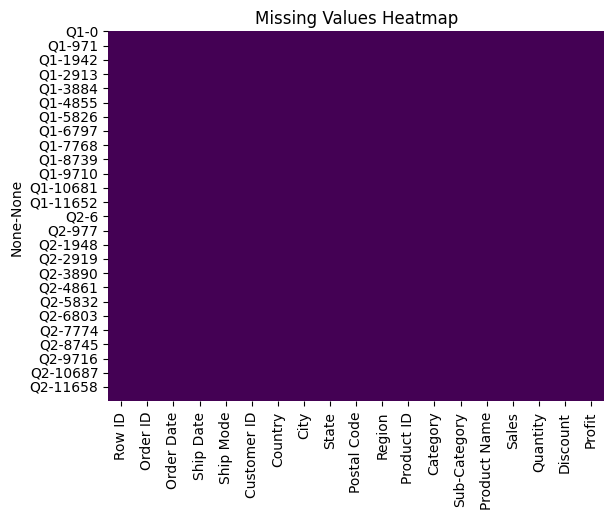

In [51]:
sns.heatmap(df_temp.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Now there are no more missing values.

## 2.5 - Outliers

In [52]:
df_temp.loc[df_temp['Order Date'] > df_temp['Ship Date'], ['Order Date', 'Ship Date']].head(5)


,,Order Date,Ship Date


Perfect, we do not have any ship date occuring before its order.

## 2.6 - Duplicates

In [53]:
df_temp.duplicated().sum()

0

There are no duplicated lines.

# 3 - DATA QUALITY

## 1 - Accuracy

Values are correct, believable, within valid ranges.

## 2 - Completeness

Data isn’t missing or empty where it shouldn’t be.

## 3 - Consistency

Data follows a uniform format, matches reference values, respects constraints.

## 4 - Timeliness

Data is correctly timestamped.

# 4 - MEMORY OPTIMIZATION
**Goal**: Check and optimize the memory load.


### Memory space optimization
Here the dataset seems very light (under 2MB) if it was above 100MB it would definitely be worth optimizing the data types to lower the load. Though it has plenty of object types that are underestimating the real load (only gauging references). 

In [54]:
# Prints memory related information for a dataframe
def df_info_memory(df, name=None):
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.memory_usage.html
    # deep=True tells pandas to calculate actual memory for object dtypes, not just references.
    total_memory_df = df.memory_usage(deep=True).sum()
    avg_memory_per_row_df = total_memory_df / len(df)
    print(f"Total memory {name}: {total_memory_df / 1024**2:.2f} MB")
    print(f"Average per row {name}: {avg_memory_per_row_df / 1024:.2f} KB \n")

df_info_memory(df_store_orders_q1, "Q1")
df_info_memory(df_store_orders_q2, "Q2")
df_info_memory(df_q1_concat_q2, "Q1+Q2")
df_info_memory(df_temp,"Cleaned Q1+Q2")

Total memory Q1: 12.05 MB
Average per row Q1: 0.98 KB 

Total memory Q2: 12.05 MB
Average per row Q2: 0.98 KB 

Total memory Q1+Q2: 24.17 MB
Average per row Q1+Q2: 0.98 KB 

Total memory Cleaned Q1+Q2: 20.24 MB
Average per row Cleaned Q1+Q2: 0.82 KB 



Not only do we have a cleaned dataset now but we can clearly see that we spared around 4 MB  